In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [42]:
df = pd.read_csv("data.csv", index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
NJNY,1,7,8,10,10,5,7,8,10,8,9,9,11,11,12,12
POR,2,2,3,7,8,4,3,2,3,3,2,2,1,1,1,4
LA,3,6,2,2,2,7,4,6,6,5,7,7,7,7,7,7
CHI,4,4,6,6,7,3,2,3,2,2,3,4,4,6,6,6
WAS,5,3,7,8,9,10,8,7,9,11,11,10,10,10,11,11
SD,6,1,1,1,1,1,1,1,1,1,1,1,2,3,2,1
NC,7,11,12,12,12,12,12,12,12,12,12,12,12,12,10,9
RGN,8,10,10,9,3,6,6,5,4,4,6,5,6,5,5,5
LOU,9,9,9,3,5,8,9,9,8,10,10,11,9,9,9,10
HOU,10,5,4,4,4,2,5,4,5,6,4,3,3,2,3,2


In [43]:
teams = {
    "NJNY": "NJ/NY Gotham",
    "POR": "Portland Thorns",
    "LA": "Angel City",
    "CHI": "Chicago Red Stars",
    "WAS": "Washington Spirit",
    "SD": "San Diego Wave",
    "NC": "NC Courage",
    "RGN": "OL Reign",
    "LOU": "Racing Louisville",
    "HOU": "Houston Dash",
    "ORL": "Orlando Pride",
    "KC": "KC Current",
}
colors = {
    "NJNY": "#000000",
    "POR": "#97262c",
    "LA": "#000000",
    "CHI": "#3cb5e4",
    "WAS": "#c20032",
    "SD": "#011e40",
    "NC": "#00416b",
    "RGN": "#002f87",
    "LOU": "#c5b4e1",
    "HOU": "#ff6a01",
    "ORL": "#60269e",
    "KC": "#62cac9",
}
text = {
    "NJNY": "#ffffff",
    "POR": "#ffffff",
    "LA": "#ffffff",
    "CHI": "#000000",
    "WAS": "#ffffff",
    "SD": "#ffffff",
    "NC": "#ffffff",
    "RGN": "#ffffff",
    "LOU": "#000000",
    "HOU": "#000000",
    "ORL": "#ffffff",
    "KC": "#000000",
}

In [44]:
# Add extra columns as backdrop for team names
week = 16
extra = 4
for i in range(1, extra + 1):
    df[str(week + i)] = df[str(week)]

In [45]:
# Sort so top teams have lines drawn on top
df = df.sort_values(by=[str(week)], ascending=False)

<Figure size 28800x16200 with 0 Axes>

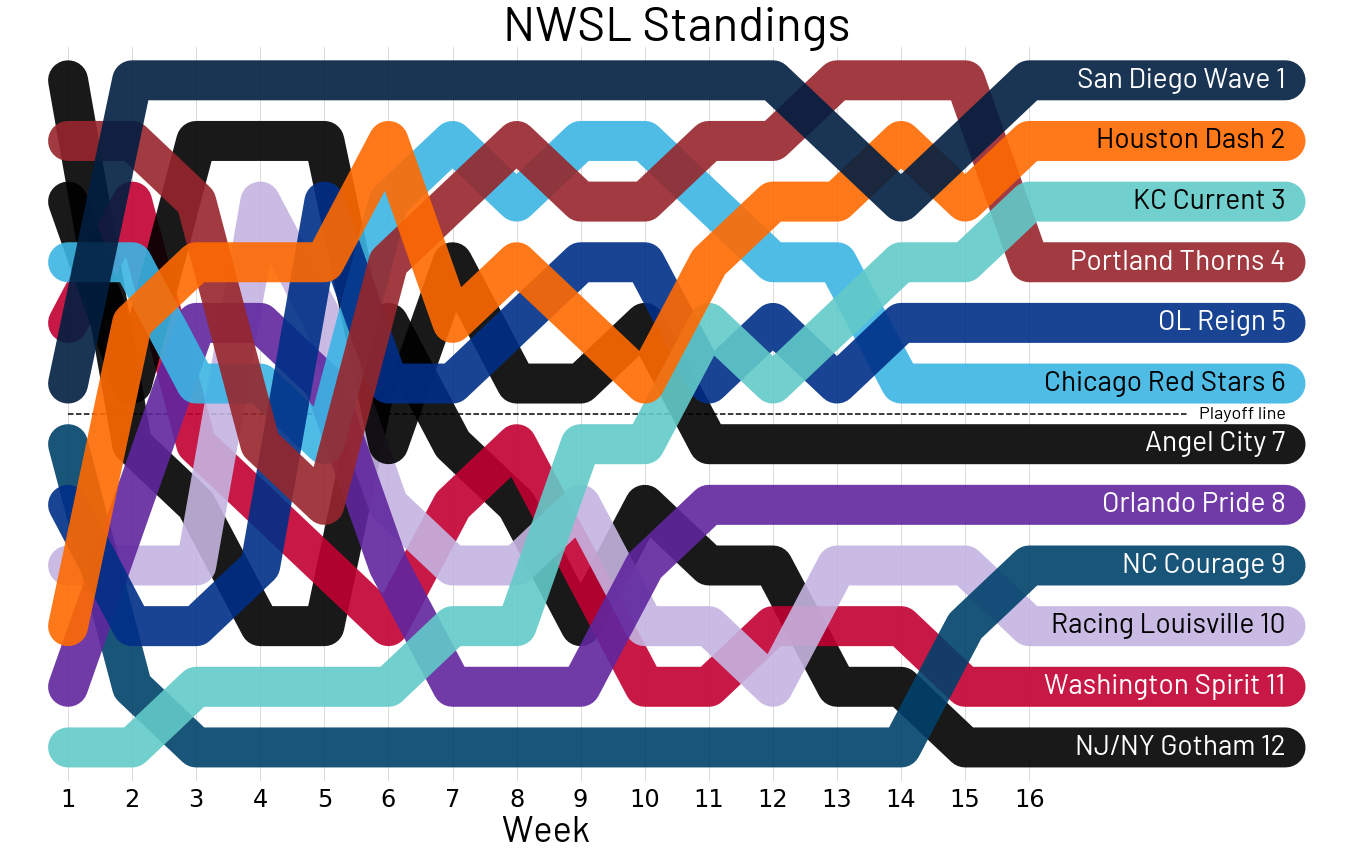

In [47]:
barlow = fm.FontProperties(fname="/home/agale/nwsl-analytics/nwsl-rank/Barlow.otf")
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

# Playoff line
plt.hlines(y=6.5, xmin=0, xmax=week + 1.5, linestyle="--", color="black")
ax.text(
    week + extra - 1,
    6.5,
    "Playoff line",
    color="black",
    fontsize=18,
    fontproperties=barlow,
    va="center",
    ha="right",
)

# Plot lines
for team in df.index:
    ax.plot(
        df.columns,
        df.loc[team],
        linewidth=40,
        color=colors[team],
        alpha=0.9,
        solid_capstyle="round",
    )

    ax.text(
        week + extra - 1,
        df.at[team, str(week)],
        teams[team] + " " + str(df.at[team, str(week)]),
        color=text[team],
        fontsize=28,
        fontproperties=barlow,
        fontweight="bold",
        va="center",
        ha="right",
    )

# Title
plt.title("NWSL Standings", fontproperties=barlow, size=48)

# General
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)

# y-axis
fig.gca().invert_yaxis()
ax.set_yticks([])
ax.yaxis.grid(False)

# x-axis
ax.set_xticks(range(0, week))
ax.xaxis.grid(True, color="lightgray")
ax.tick_params(axis="x", which="major", labelsize=24)
plt.xlabel("Week" + " " * 36, fontproperties=barlow, size=36)

# Save image
plt.savefig("week" + str(week) + ".png", bbox_inches="tight")